## Importing the libraries

In [1]:
from __future__ import division, print_function, unicode_literals
from io import open
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten, GlobalMaxPooling2D
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd 
import cv2
from PIL import Image
import os


Using TensorFlow backend.


### loading the data

#### Previewing the data

In [2]:
#loading the train data
train = pd.read_csv('train.csv')
train.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


This is a classification task. Let us check the number of classes that we are aiming to classify the data into

In [3]:
train.ClassId.unique()

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

The data has 43 unique classes

In [4]:
#loading the test data
test = pd.read_csv('test.csv')
test.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [5]:
pip list

Package                            Version  
---------------------------------- ---------
absl-py                            0.8.1    
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
asn1crypto                         1.0.1    
astor                              0.8.0    
astroid                            2.3.1    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.2.0   
autopep8                           1.5      
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.6.1    
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0    
bitarray  

### properties of the data

In [6]:
#checking the shape of the train dataset
train.shape

(39209, 8)

In [7]:
test.shape

(12630, 8)

In [8]:
train.ClassId.nunique()

43

In [9]:
test.ClassId.nunique()

43

Now, let us view the data distribution in the train dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266FA969C08>]],
      dtype=object)

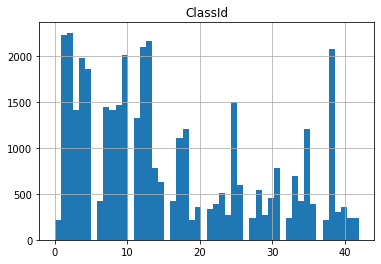

In [10]:
#histogram to show the distribution of a column
train.hist(column='ClassId', bins=50)

## Loading the images

The images are located in the same directory as the notebook. we need to specify the path to locate the images
so that we can read the image data

In [11]:
#specifying the path and printing the document names
print(os.listdir('../Image Classification Task Kaggle'))

['.ipynb_checkpoints', 'Image Classification.ipynb', 'Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


Next, we put the images in an array in order to read and load them into our environment

In [13]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
num_classes = 43
n_inputs = height * width*channels

for i in range(num_classes) :
    path = "../Image Classification Task Kaggle/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
x_train=np.array(data)
x_train= x_train/255.0

from keras.utils.np_utils import to_categorical
y_train=np.array(labels)
y_train = to_categorical(y_train, num_classes) # Using one hote encoding

../Image Classification Task Kaggle/Train/0/
../Image Classification Task Kaggle/Train/1/
../Image Classification Task Kaggle/Train/2/
../Image Classification Task Kaggle/Train/3/
../Image Classification Task Kaggle/Train/4/
../Image Classification Task Kaggle/Train/5/
../Image Classification Task Kaggle/Train/6/
../Image Classification Task Kaggle/Train/7/
../Image Classification Task Kaggle/Train/8/
../Image Classification Task Kaggle/Train/9/
../Image Classification Task Kaggle/Train/10/
../Image Classification Task Kaggle/Train/11/
../Image Classification Task Kaggle/Train/12/
../Image Classification Task Kaggle/Train/13/
../Image Classification Task Kaggle/Train/14/
../Image Classification Task Kaggle/Train/15/
../Image Classification Task Kaggle/Train/16/
../Image Classification Task Kaggle/Train/17/
../Image Classification Task Kaggle/Train/18/
../Image Classification Task Kaggle/Train/19/
../Image Classification Task Kaggle/Train/20/
../Image Classification Task Kaggle/Train/21

In [ ]:
Now, the data is ready for training. we will use the train  data for training and validation,
after which, we will subject the model to test data to rate its accuracy.

In [14]:
# Split Data
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_train,Y_validation = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)

print("Train :", X_train.shape)
print("Validation :", X_validation.shape)
print("Train :", Y_train.shape)
print("Validation :", Y_validation.shape)

Train : (27446, 30, 30, 3)
Validation : (11763, 30, 30, 3)
Train : (27446, 43)
Validation : (11763, 43)


Before we proceed to modelling, let us preview some random images from the dataset

Train images


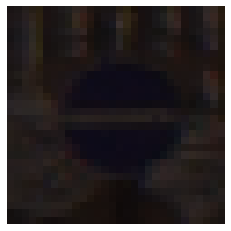

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


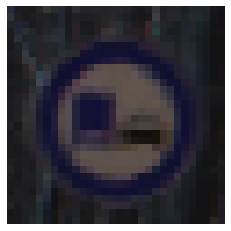

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


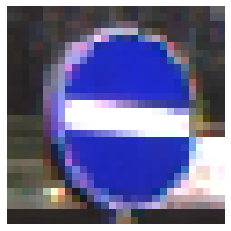

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
import matplotlib.pyplot as plt
import random

def show_images(images, labels, amount):
    for i in range(amount):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()       
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

print("Train images")
show_images(X_train, Y_train, 3)

## Modelling

### Building the model

In [16]:
# Build Model and give the model summary
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________

### Compiling the model

In [17]:
#model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model

In [ ]:
We will use 10 epochs(iterations to train the model)

In [18]:
# Train Model
epochs = 2
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), batch_size=32,
                    epochs=epochs,verbose=1)

Train on 27446 samples, validate on 11763 samples
Epoch 1/2
27446/27446 [==============================] - 112s 4ms/sample - loss: 1.6156 - acc: 0.5341 - val_loss: 0.3185 - val_acc: 0.9067
Epoch 2/2
27446/27446 [==============================] - 112s 4ms/sample - loss: 0.3590 - acc: 0.8860 - val_loss: 0.1154 - val_acc: 0.9676


### Evaluating the performance

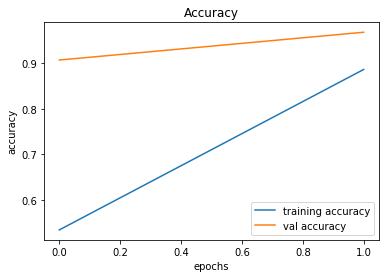

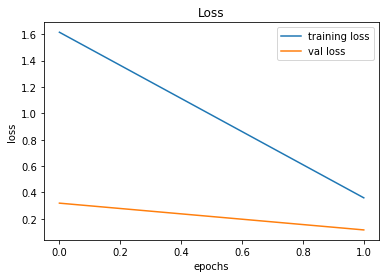

In [19]:
# ploting the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Predicting using new data

In [20]:
# Predicting with Test data 
y_test=pd.read_csv("../Image Classification Task Kaggle/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../Image Classification Task Kaggle/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255  
pred = model.predict_classes(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Checking the Accuracy

#### AUC score

In [21]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.07184107744107743

#### Classification report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        60
           1       0.91      0.94      0.93       720
           2       0.89      0.95      0.92       750
           3       0.79      0.92      0.85       450
           4       0.99      0.90      0.94       660
           5       0.81      0.91      0.86       630
           6       1.00      0.69      0.81       150
           7       0.94      0.83      0.88       450
           8       0.90      0.90      0.90       450
           9       0.96      0.97      0.97       480
          10       0.98      0.99      0.99       660
          11       0.90      0.90      0.90       420
          12       0.99      0.96      0.97       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.98      0.95      0.97       210
          16       0.97      0.96      0.97       150
          17       1.00    

#### Accuracy score

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9254948535233571

#### Confusion Matrix

<Figure size 432x288 with 0 Axes>

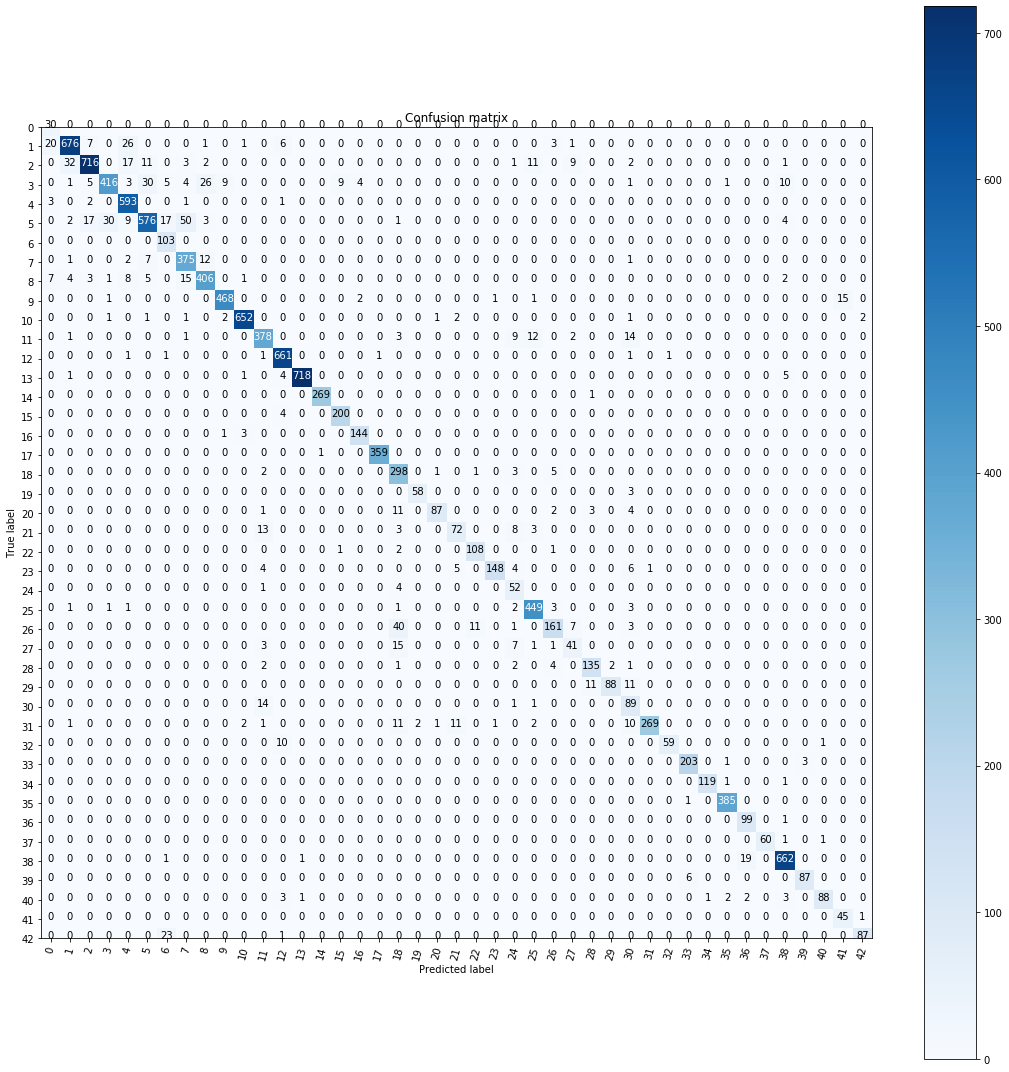

In [24]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(pred,y_test)

plt.figure(2)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')